In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [7]:
df = pd.read_csv('..\Initial_data\K5Q3\K5Q3_cor.csv', ";")
df

C:\Users\Graf_35\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,K5P5_1.PV,K5P5_2.PV,K5BSB_1.PV,K5BSB_2.PV,K5Q3.PV,K5T6.PV,K5P10.PV,K5LCV2I.PV,K5LCV1I.PV,K5F5.PV,...,K5T2_1.PV,K5T2_2.PV,K0P102_1.PV,K0T104_2.PV,K5F6X.PV,K5T16.PV,K5T15.PV,K5P8.PV,K5T17.PV,K5L2.PV
0,-40.09245,-39.373440,38.50135,55.80167,1.193818,159.1390,4.220714,0.296719,48.21370,33.58688,...,418.8025,414.9125,4.090837,399.5566,25.91725,96.04542,109.2933,3.947831,125.8089,272.8238
1,-39.79466,-39.144660,38.05667,55.72771,1.127047,159.4960,4.223948,0.297396,50.01099,33.75279,...,418.4803,414.5512,4.092775,399.6491,25.95287,95.98844,109.3435,3.949697,125.8541,272.7920
2,-40.09753,-39.451950,38.08927,55.77531,1.189578,159.7962,4.229422,0.301510,51.17776,34.27409,...,418.1625,414.1656,4.094706,399.5097,25.87472,95.92969,109.4133,3.949778,125.8552,272.5587
3,-40.04427,-40.015240,38.10891,55.77896,1.130844,159.9692,4.233427,0.297656,51.77229,34.62391,...,418.0356,414.0303,4.096784,399.6128,25.80683,95.83218,109.4946,3.954266,125.7343,273.4935
4,-39.67149,-38.286720,38.09208,55.95422,1.166927,159.9702,4.239511,0.300312,52.38120,34.65617,...,417.9797,413.9844,4.102347,399.7712,25.68059,95.74865,109.5350,3.957666,125.5335,273.1667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25913,-40.23672,1.218625,37.05031,200.42630,4.053206,102.8775,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25914,-38.01484,1.165594,36.95500,200.54000,4.052794,102.9075,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25915,-39.68828,1.184344,37.59563,200.45750,4.052081,102.9000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25916,-42.10547,1.256281,38.10844,200.54500,4.052231,102.9675,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

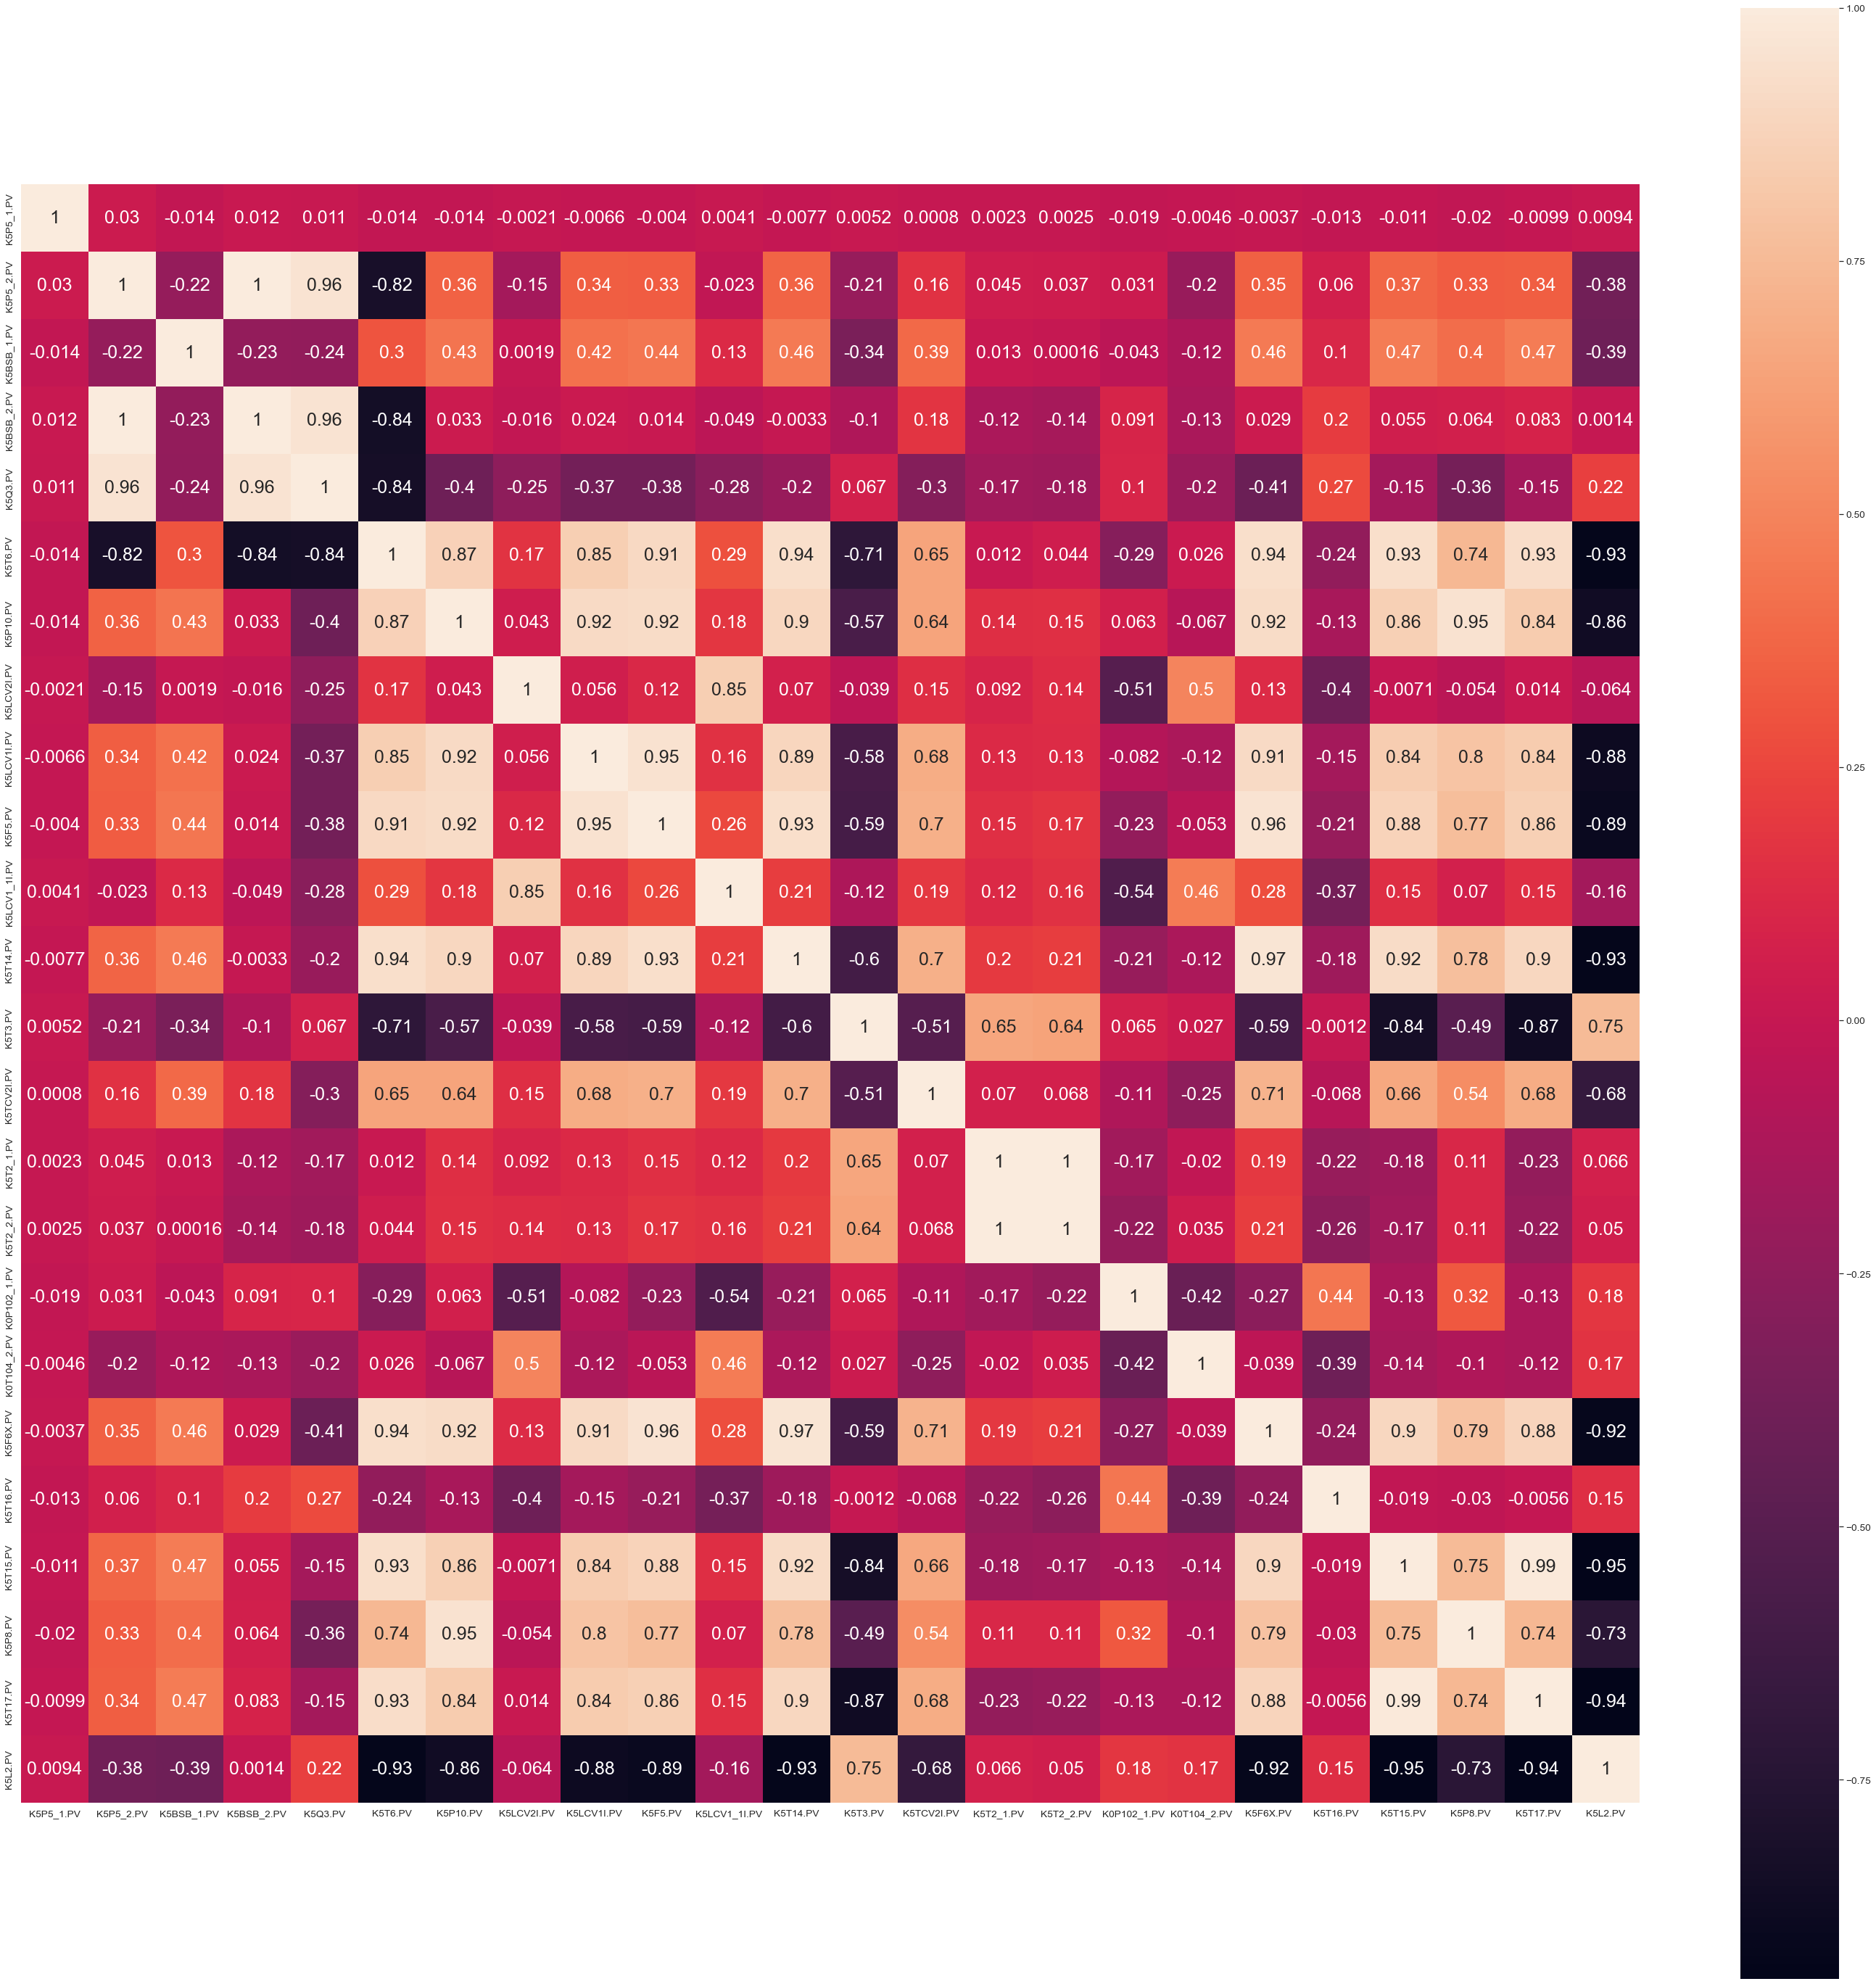

In [8]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [41]:
df = pd.read_csv('..\Initial_data\K5Q3\K5Q3.csv', ";")
df

C:\Users\Graf_35\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,K5P5_2.PV,K5BSB_2.PV,K5Q3.PV
0,-39.38672,55.89859,0.563505
1,-39.71315,55.59271,0.572812
2,-39.08529,56.29583,0.583573
3,-39.61094,56.32755,0.588776
4,-40.74375,56.96047,0.592760
...,...,...,...
24475,-39.50677,55.24557,2.192333
24476,-39.76380,55.40932,2.212760
24477,-39.70078,55.74271,2.220516
24478,-38.78112,55.46912,2.224297


In [42]:
df=df.dropna()
df=df.round(2)
df=df.drop_duplicates(["K5P5_2.PV"])
df=df.drop_duplicates(["K5BSB_2.PV"])
df=df.drop_duplicates(["K5Q3.PV"])
df

,K5P5_2.PV,K5BSB_2.PV,K5Q3.PV
0,-39.39,55.90,0.56
1,-39.71,55.59,0.57
2,-39.09,56.30,0.58
3,-39.61,56.33,0.59
6,-41.02,57.51,0.61
7,-41.01,56.88,0.62
9,-40.10,56.93,0.63
11,-40.43,56.58,0.64
14,-39.95,57.44,0.65
17,-40.47,57.53,0.66


In [76]:
y = df.drop(['K5P5_2.PV', 'K5BSB_2.PV'], axis=1)
x = df.drop(['K5Q3.PV', 'K5P5_2.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)
task = np.linspace(55, 60, 100)[:, np.newaxis] # Точки для предсказания

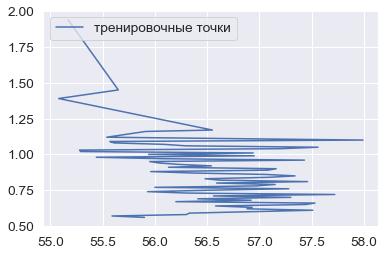

In [77]:
plt.plot(x, y, label = 'тренировочные точки') 
plt.legend(loc='upper left') 
plt.show()

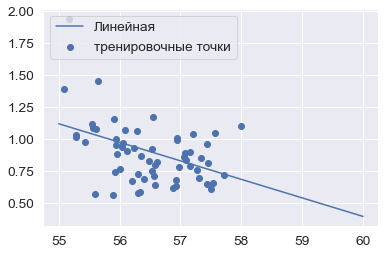

array([-0.47909602, -0.19096675])

In [78]:
lr = LinearRegression() # Линейная регрессия
lr.fit(X_train, y_train) # Обучим линейную регрессию
F5 = lr.predict(task) # Предсказываем y для линейной регрессии
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, F5, label = 'Линейная') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(lr, X_test, y_test, cv=2)

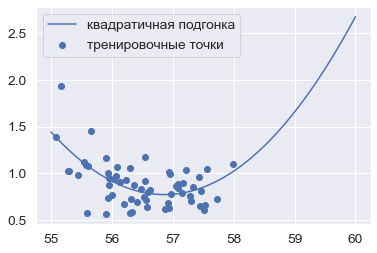

array([-0.47909602, -0.19096675])

In [79]:
pr = LinearRegression() # Линейная регрессия
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_train)       # Преобразуем данные
pr.fit(X_quad, y_train) # Обучаем полиномиальную регрессию
y_pr = pr.predict(quadratic.fit_transform(task)) # Предсказываем y для полиномиальной регрессии

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr, X_test, y_test, cv=2)

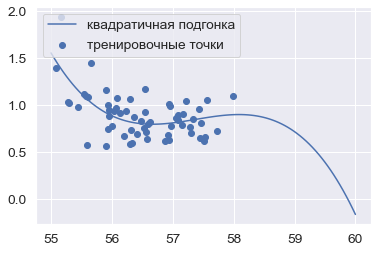

array([-0.47909602, -0.19096675])

In [80]:
pr_3 = LinearRegression()
cube = PolynomialFeatures(degree=3)
X_cub = cube.fit_transform(X_train)   
pr_3.fit(X_cub, y_train)
y_pr = pr_3.predict(cube.fit_transform(task))
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_3, X_test, y_test, cv=2)

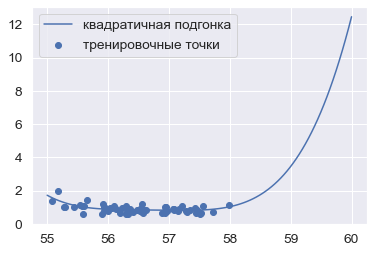

array([-0.47909602, -0.19096675])

In [81]:
pr_4 = LinearRegression()
Fig = PolynomialFeatures(degree=4)
X_15 = Fig.fit_transform(X_train)   
pr_4.fit(X_15, y_train)
y_pr_4 = pr_4.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_4, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_4, X_test, y_test, cv=2)

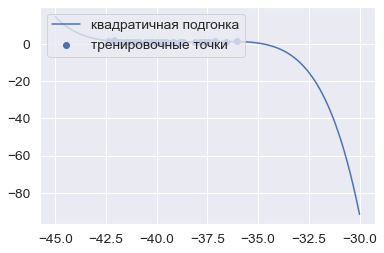

array([-1.11236909, -0.43901762])

In [71]:
pr_5 = LinearRegression()
Fig = PolynomialFeatures(degree=5)
X_5 = Fig.fit_transform(X_train)   
pr_5.fit(X_5, y_train)
y_pr_5 = pr_5.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_5, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_5, X_test, y_test, cv=2)

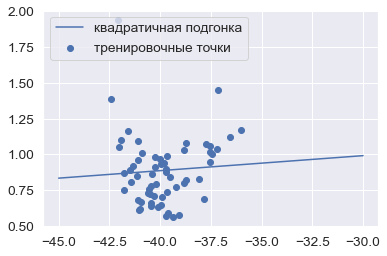

-0.1369122272361425

In [72]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(x, y)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(x, y)
y_pr=clf.predict(task)
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
clf.score(X_test, y_test)

In [82]:
import pickle
filename = '../model/K5Q3.sav'
pickle.dump(clf, open(filename, 'wb'))

In [83]:
loaded_model = pickle.load(open("../model/K5Q3.sav", 'rb'))

In [84]:
task2 = {'K5BSB_2.PV':[55.7]}
df2 = pd.DataFrame(data=task2)
df2

,K5BSB_2.PV
0,55.7


In [85]:
loaded_model.predict(df2)

array([[1.88865166]])